# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [69]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import plotly.figure_factory as ff
import plotly.express as px
from mpmath.libmp import normalize

%matplotlib inline

Прочитаем исходные данные:

In [70]:
data = pd.read_csv('/Users/GoncharovDS/mephi_sf/linal/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [87]:
print('VR min:', data['VR'].min())
print('VR max:', data['VR'].max())

VR min: 0.93
VR max: 2.87


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [71]:
# Ваш код здесь
df = pd.DataFrame(data)
df

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


In [72]:
df_values = df.values

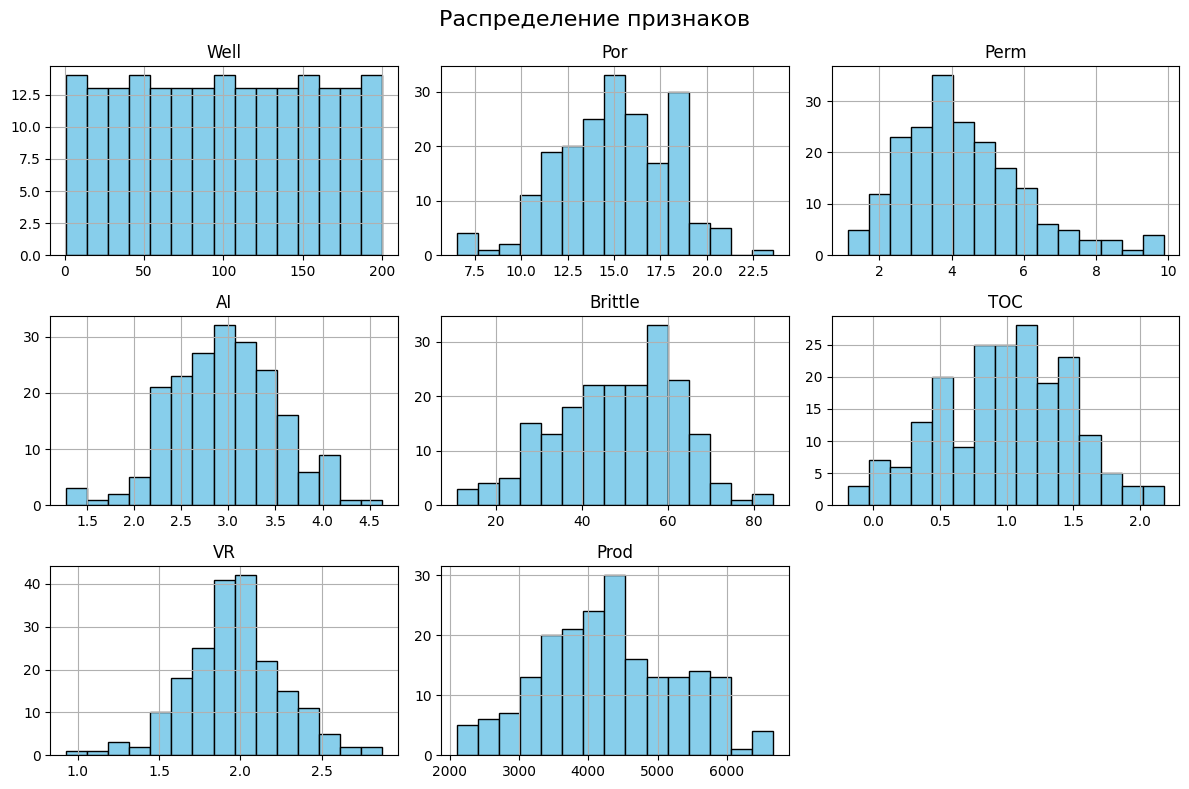

In [73]:
data.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Распределение признаков', fontsize=16)
plt.tight_layout()
plt.show()

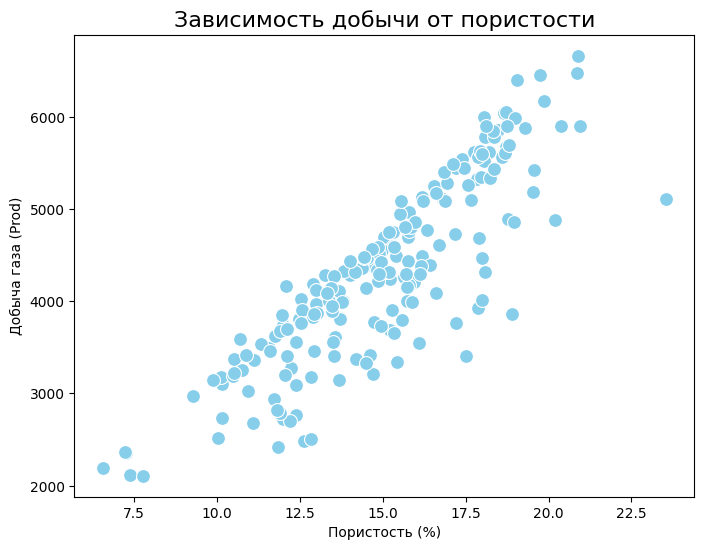

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Por', y='Prod', s=100, color='skyblue')
plt.title('Зависимость добычи от пористости', fontsize=16)
plt.xlabel('Пористость (%)')
plt.ylabel('Добыча газа (Prod)')
plt.show()

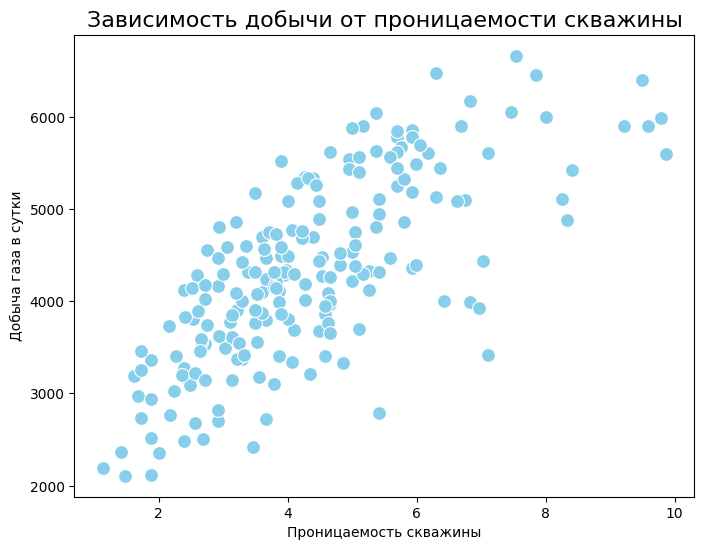

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Perm', y='Prod', s=100, color='skyblue')
plt.title('Зависимость добычи от проницаемости скважины', fontsize=16)
plt.xlabel('Проницаемость скважины')
plt.ylabel('Добыча газа в сутки')
plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

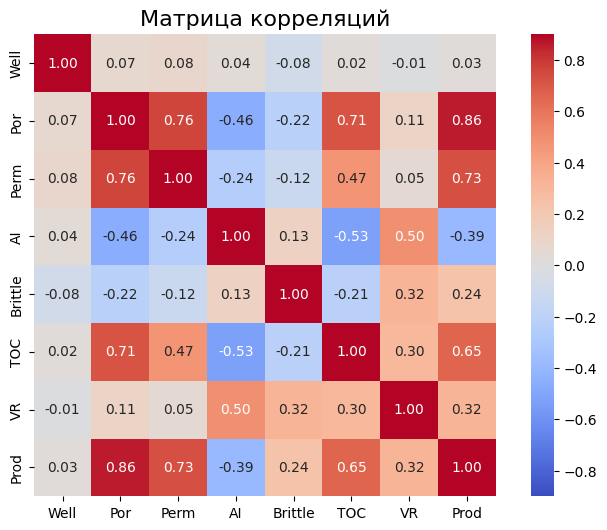

In [76]:
# Ваш код здесь
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot = True, fmt='.2f', vmin=-0.9, vmax=0.9, center=0, cmap='coolwarm', square=True)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

In [78]:
print('Ранг матрицы корреляций: ', np.linalg.matrix_rank(df.corr()))
print('Определитель матрицы корреляций: ', round(np.linalg.det(df.corr()), 7))

Ранг матрицы корреляций:  8
Определитель матрицы корреляций:  0.0007299


> *Ваши выводы здесь*

Добыча газа в сутки больше всего кореллирует с такими показателями как POR (пористость скважины), Perm (проницаемость скважины) и TOC (общий органический углерод)
Определитель корелляционной матрицы близок к нулю, а значит матрица плохо обусловлена. Скорее всего будут проблемы при вычислениях.
Коллинеарность и мультиколлинеарность отсутствуют.
Перед применением классической модели линейной регрессии необходимо провести дополнительную обработку данных.
Идентификатор скважины не несет никакого смысла. Есть параметры со слабой корелляцией.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [90]:
# Ваш код здесь
# Создаем матрицы наблюдений X и вектор правильных ответов y
X = np.column_stack((np.ones(data.shape[0]), data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]))
y = data['Prod'].values

# По методу наименьших квадратов строим модель линейной регрессии
w_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Вывод результата (округлим до целого)
print('Оценки коэффициентов модели линейной регрессии, округленные до целого:')
print(np.round(w_hat, 0))

Оценки коэффициентов модели линейной регрессии, округленные до целого:
[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


*Ваши выводы здесь*
Идентификатор скважины (Well) не оказывает никакого влияния на целевую переменную. От него можно избавиться, это никак не повлияет на модель.
Все остальные признаки оказывают различное влияние на целевую переменную.
При увеличении пористости скважины на 1% добыча вырастет на 230 млн кубически футов в сутки
При увеличении проницаемость на 1% добыча вырастает на 116 млн кубических футов в сутки
При увеличении коэффициента хрупкости на 1 % добыча снижается на 365 млн кубических футов в сутки
При увеличении коэффициента отражения витринита на 1% добыча вырастает на 785млн кубических футов в сутки


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [104]:
# Ваш код здесь
# а
new_data = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}
new_data_array = np.array([1, *new_data.values()])  # Добавляем единицу для интерцепта

# Прогноз выработки для новой скважины
new_prod_predict = new_data_array @ w_hat

# Реальная выработка для новой скважины
new_prod_real = 4748.315024

# Вывод прогноза и абсолютной ошибки
print(f'Прогнозируемая выработка для новой скважины: {new_prod_predict:.6f}')
print(f'Абсолютная ошибка прогноза равна: {abs(new_prod_real - new_prod_predict):.6f}')

Прогнозируемая выработка для новой скважины: 4723.064054
Абсолютная ошибка прогноза равна: 25.250970


In [108]:
# б

# Прогноз выработки для всех скважин из обучающего набора данных
prediction = X @ w_hat

# Расчет метрик
mae = np.abs(y - prediction).mean()
mse = ((y - prediction) ** 2).mean()

# Вывод результатов
print(f'Среднее отклонение реальных данных от прогноза = {mae:.6f}')
print(f'Среднее квадратическое отклонение реальных данных от прогноза = {mse:.6f}')

Среднее отклонение реальных данных от прогноза = 153.622971
Среднее квадратическое отклонение реальных данных от прогноза = 39315.040140


> *Ваши выводы здесь*
Для предложенной скважины прогноз получился с относительно небольшой ошибкой - 25
Среднее отклонение (и среднеквадратичное отклонение) для всех данных получилось уже довольно большим, что свидетельствует о недостаточном качестве построенной модели

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [116]:
# Ваш код здесь
display(df.corr().loc['Prod'])

print(np.round(w_hat, 0))

Well       0.026817
Por        0.861910
Perm       0.727426
AI        -0.390835
Brittle    0.237155
TOC        0.654445
VR         0.323182
Prod       1.000000
Name: Prod, dtype: float64

[-1232.     0.   230.   116.  -365.    25.   -78.   785.]


> *Ваши выводы здесь*
Отрицательный коэффициент при высокой корреляции наблюдается у фактора TOC (общий органический углерод). Вероятно это связано в ошибками в модели.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [119]:
# Ваш код здесь
cleaned_data = data.drop(['Perm', 'Well'], axis=1)

x_clean = np.column_stack((np.ones(cleaned_data.shape[0]), cleaned_data[['Por', 'AI', 'Brittle', 'TOC', 'VR']]))
y_clean = cleaned_data[['Prod']]

w_hat_clean = np.linalg.inv(x_clean.T@x_clean)@x_clean.T@y_clean
print(np.round(w_hat_clean.values, 0))

[[-1889.]
 [  290.]
 [ -140.]
 [   29.]
 [   89.]
 [  407.]]


> *Ваши выводы здесь*
При увеличении пористости скважины на 1% добыча вырастает на 290 млн кубических футов в сутки. Ранее 230 - влияние фактора выросло.
При увеличении акустического импеданса на 1 добыча снизится на 140 млн кубических футов в сутки. Ранее (-365) - влияние фактора снизилось.
При увеличении общего органического углерода на 1% добыча вырастает на 89 млн кубических футов в сутки. Ранее (-78) - коэффициент стал положительным, что соответствует характеру связи в соответствии с матрицей корреляции.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [127]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# модель линейной регрессии
lr = LinearRegression(fit_intercept=False)
# коэффициенты регрессии
lr.fit(x_clean, y_clean)

print('Коэффициенты по sklearn:', np.round(lr.coef_))

# прогноз для всех данных
new_prediction_lr = lr.predict(x_clean)
# представим прогноз в виде датафрейма pandas
df_prediction_lr = pd.DataFrame(new_prediction_lr)

# метрики среднего абсолютного (mae) и среднего квадратического (mse) отклонений
lr_mae = (np.abs(cleaned_data['Prod'] - df_prediction_lr[0])).sum() / cleaned_data.shape[0]
lr_mse = ((cleaned_data['Prod'] - df_prediction_lr[0]) ** 2).sum() / cleaned_data.shape[0]

print(f'Среднее отклонение по sklearn = {lr_mae:.6f}')
print(f'Среднее квадратическое отклонение по sklearn = {lr_mse:.6f}')

Коэффициенты по sklearn: [[-1889.   290.  -140.    29.    89.   407.]]
Среднее отклонение по sklearn = 170.365417
Среднее квадратическое отклонение по sklearn = 53393.679736


> *Ваши выводы здесь*
Коэффициенты и метрики ошибок, вычесленные вручную и с помощью библиотеки sklearn, аналогичны. Значит мы не ошиблись в вычислениях.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [129]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [130]:
# Ваш код здесь
X = cleaned_data[['Por', 'AI', 'Brittle', 'TOC', 'VR']]
y = cleaned_data['Prod']

scaler = StandardScaler()
# стандартизируем признаки
X_scaled = scaler.fit_transform(X)

poly = PolynomialFeatures(degree=3, include_bias=False)
# добавляем полиномиальные признаки
X_poly = poly.fit_transform(X_scaled)

print(f'Количество получившихся факторов = {X_poly.shape[1]}')

# создаем модель линейной регрессии с интерцептом
lr_poly = LinearRegression(fit_intercept=True)
# проводим кросс-валидацию по двум метрикам
lr_poly_mae = cross_validate(lr_poly, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_poly_mse = cross_validate(lr_poly, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_poly_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_poly_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_poly_mse['test_score'].mean()))

Количество получившихся факторов = 55
MAE на тренировочных фолдах: 61.91
MAE на валидационных фолдах: 116.97
MSE на тренировочных фолдах: 6809.78
MSE на валидационных фолдах: 24965.78


> *Ваши выводы здесь*

Качество модели заметно повысилось. Об этом говорит улучшение метрик MAE и MSE по сравнению с обычной линейной регрессией. Большое расхождение между тренировочными и валидационными фолдами гвоорит о переобучении модели, это связано с малым объемом исходного датасета

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [131]:
# Ваш код здесь
# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]}

# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
lasso_gs = GridSearchCV(Lasso(fit_intercept=True, max_iter=10000),
                     alpha_values,
                     scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                     refit='neg_mean_absolute_error',
                     cv=5)

# лучшие найденные гиперпараметры
best_params_lasso = lasso_gs.fit(X_poly, y).best_params_
alpha_lasso = best_params_lasso['alpha']

print('Лучшее значение alpha:', alpha_lasso)

# создаем модель
lasso = Lasso(alpha=alpha_lasso, fit_intercept=True)

# проводим кросс-валидацию по двум метрикам
lasso_mae = cross_validate(lasso, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lasso_mse = cross_validate(lasso, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-lasso_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lasso_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lasso_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lasso_mse['test_score'].mean()))

Лучшее значение alpha: 4
MAE на тренировочных фолдах: 71.32
MAE на валидационных фолдах: 88.98
MSE на тренировочных фолдах: 9349.06
MSE на валидационных фолдах: 14651.15


> *Ваши выводы здесь*
Качество модели повысилось за счет использования $L_1$-регуляризации

По сравнению с полиномиальной регрессией снизилось значение метрик ошибок на валидационных фолдах. Снижение разницы между валидационными и тренировочными фолдами снизилась, что свидетельствует и снижении переобучения модели

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [132]:
# Ваш код здесь
# Передаем в GridSearchCV модели след. значения:
ridge_gs = GridSearchCV(Ridge(fit_intercept=True),
                        alpha_values,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                        refit='neg_mean_absolute_error',
                        cv=5)

# лучшие найденные гиперпараметры
best_params_ridge = ridge_gs.fit(X_poly, y).best_params_
alpha_ridge = best_params_ridge['alpha']

print('Лучшее значение alpha:', alpha_ridge)

# создаем модель
ridge = Ridge(alpha=alpha_ridge, fit_intercept=True)

# проводим кросс-валидацию по двум метрикам
ridge_mae = cross_validate(ridge, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
ridge_mse = cross_validate(ridge, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-ridge_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-ridge_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-ridge_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-ridge_mse['test_score'].mean()))

Лучшее значение alpha: 1
MAE на тренировочных фолдах: 65.19
MAE на валидационных фолдах: 105.37
MSE на тренировочных фолдах: 7648.93
MSE на валидационных фолдах: 19414.05


> *Ваши выводы здесь*

По сравнению с $L_1$-регуляризацией качество снизилось. Судя по значению метрик $L_2$-регуляризация показывает лучший результат по сравнению с полиномиальной регрессией. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [133]:
# Ваш код здесь

import warnings
warnings.filterwarnings('ignore')

grid_values = {
    'alpha': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20],
    'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
en_gs = GridSearchCV(ElasticNet(fit_intercept=True, max_iter=10000),
                        grid_values,
                        scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'],
                        refit='neg_mean_absolute_error',
                        cv=5)

# лучшие найденные гиперпараметры
best_params_en = en_gs.fit(X_poly, y).best_params_
alpha_en = best_params_en['alpha']
l1_ratio_en = best_params_en['l1_ratio']

print(f'Лучшее значение alpha: {alpha_en}, l1_ratio: {l1_ratio_en}')

# создаем модель
en = ElasticNet(alpha=alpha_en, l1_ratio=l1_ratio_en, fit_intercept=True)

# проводим кросс-валидацию по двум метрикам
en_mae = cross_validate(en, X_poly, y, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
en_mse = cross_validate(en, X_poly, y, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-en_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-en_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-en_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-en_mse['test_score'].mean()))

Лучшее значение alpha: 0.1, l1_ratio: 0.9
MAE на тренировочных фолдах: 68.26
MAE на валидационных фолдах: 106.35
MSE на тренировочных фолдах: 8351.25
MSE на валидационных фолдах: 19604.80


> *Ваши выводы здесь*

Результат на валидационных фолдах получился хуже, чем в предыдущих чистых вариантах L1 и L2
Большой разброс значений между тренировочными и валидационными фолдами говорит о переобучении модели
Модель стремится к $L_1$-регуляризации

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [134]:
# Ваш код здесь
# кросс-валидация модели линейной регрессии без полиномиальных признаков
lr_mae = cross_validate(lr, x_clean, y_clean, scoring='neg_mean_absolute_error', cv=5, return_train_score=True)
lr_mse = cross_validate(lr, x_clean, y_clean, scoring='neg_mean_squared_error', cv=5, return_train_score=True)

print('MAE на тренировочных фолдах: {:.2f}'.format(-lr_mae['train_score'].mean()))
print('MAE на валидационных фолдах: {:.2f}'.format(-lr_mae['test_score'].mean()))
print('MSE на тренировочных фолдах: {:.2f}'.format(-lr_mse['train_score'].mean()))
print('MSE на валидационных фолдах: {:.2f}'.format(-lr_mse['test_score'].mean()))

MAE на тренировочных фолдах: 169.63
MAE на валидационных фолдах: 179.87
MSE на тренировочных фолдах: 52763.70
MSE на валидационных фолдах: 59199.52


In [135]:
# создадим справочник из данных по моделям
dict = {
    'Модель': ['Lineal', 'Polynomial', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': [np.nan, np.nan, best_params_lasso, best_params_ridge, best_params_en],
    'Полиномиальные признаки': [False, True, True, True, True],
    'MAE train': [-lr_mae['train_score'].mean(),-lr_poly_mae['train_score'].mean(),-lasso_mae['train_score'].mean(),-ridge_mae['train_score'].mean(),-en_mae['train_score'].mean()],
    'MAE test': [-lr_mae['test_score'].mean(),-lr_poly_mae['test_score'].mean(),-lasso_mae['test_score'].mean(),-ridge_mae['test_score'].mean(),-en_mae['test_score'].mean()],
    'MSE train': [-lr_mse['train_score'].mean(),-lr_poly_mse['train_score'].mean(),-lasso_mse['train_score'].mean(),-ridge_mse['train_score'].mean(),-en_mse['train_score'].mean()],
    'MSE test': [-lr_mse['test_score'].mean(),-lr_poly_mse['test_score'].mean(),-lasso_mse['test_score'].mean(),-ridge_mse['test_score'].mean(),-en_mse['test_score'].mean()],
}

# создаем датафрейм
df = pd.DataFrame(dict)

# для удобства анализа добавим столбцы с отклонением метрик между валидационными и тренировочными фолдами
df['MAE dev'] = df['MAE test'] - df['MAE train']
df['MSE dev'] = df['MSE test'] - df['MSE train']
df

,Модель,Гиперпараметры,Полиномиальные признаки,MAE train,MAE test,MSE train,MSE test,MAE dev,MSE dev
0,Lineal,NaN,False,169.631878,179.871065,52763.700219,59199.517278,10.239186,6435.817059
1,Polynomial,NaN,True,61.913339,116.969121,6809.782493,24965.782790,55.055782,18156.000297
2,Lasso,{'alpha': 4},True,71.316109,88.976787,9349.064406,14651.152635,17.660678,5302.088229
3,Ridge,{'alpha': 1},True,65.192889,105.371899,7648.930915,19414.045227,40.179010,11765.114312
4,ElasticNet,"{'alpha': 0.1, 'l1_ratio': 0.9}",True,68.256934,106.351305,8351.250769,19604.796009,38.094370,11253.545239


> *Ваши выводы здесь*

Наиболее качественной является модель с $L_1$ регуляризацией